In [1]:
from typing_extensions import TypedDict
from typing import Literal

class TypedDictState(TypedDict):
    name:str
    game:Literal["cricket","football"]
    
    

In [ ]:
def play_game(state:TypedDictState):
    print("---Play Game node  has been called---")
    return {"name":state['name']+ " want to play "}

def cricket(state:TypedDictState):
    print("---Cricket Game node  has been called---")
    return {"name":state['name']+ " cricket" ,"game":"cricket"}

def football(state:TypedDictState):
    print("---Football Game node  has been called---")
    return {"name":state['name']+ "  football" ," game":"football"}

In [30]:
import random
def decide_play(state:TypedDictState) -> Literal["cricket","football"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "football"


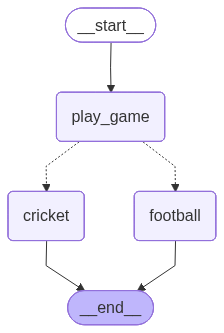

In [31]:

from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(TypedDictState)
builder.add_node("play_game",play_game)
builder.add_node("cricket",cricket)
builder.add_node("football",football)

## FLow of the graph
builder.add_edge(START,"play_game")
builder.add_conditional_edges("play_game",decide_play)
builder.add_edge("cricket", END)
builder.add_edge("football", END)


graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [36]:
graph.invoke({"name":"Soumen"})

---Play Game node  has been called---
---Cricket Game node  has been called---


{'name': 'Soumen want to play  cricket', 'game': 'cricket'}

In [37]:
## Dataclass

from dataclasses import dataclass

@dataclass
class DataClassState:
    name:str
    game:Literal["cricket","football"]

In [39]:
def play_game(state:DataClassState):
    print("---Play Game node  has been called---")
    return {"name":state.name+ " want to play "}

def cricket(state:DataClassState):
    print("---Cricket Game node  has been called---")
    return {"name":state.name+ " cricket" ,"game":"cricket"}

def football(state:DataClassState):
    print("---Football Game node  has been called---")
    return {"name":state.name+ "  football" ," game":"football"}


In [40]:
import random
def decide_play(state:DataClassState) -> Literal["cricket","football"]:
    if random.random() < 0.5:
        return "cricket"
    else:
        return "football"

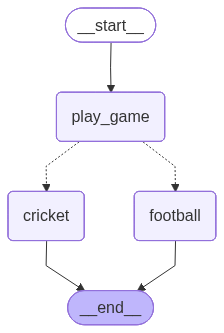

In [41]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

builder=StateGraph(DataClassState)
builder.add_node("play_game",play_game)
builder.add_node("cricket",cricket)
builder.add_node("football",football)

## FLow of the graph
builder.add_edge(START,"play_game")
builder.add_conditional_edges("play_game",decide_play)
builder.add_edge("cricket", END)
builder.add_edge("football", END)


graph=builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [47]:
graph.invoke(DataClassState(name="Soumen",game="cricket"))

---Play Game node  has been called---
---Cricket Game node  has been called---


{'name': 'Soumen want to play  cricket', 'game': 'cricket'}